In [1]:
# using Pkg
# Pkg.generate("model3")

In [2]:
# using Pkg
# Pkg.add("OrdinaryDiffEq")
# Pkg.add("DifferentialEquations")
# Pkg.add("ModelingToolkit")
# Pkg.add("DataDrivenDiffEq")
# Pkg.add("LinearAlgebra")
# Pkg.add("DiffEqSensitivity")
# Pkg.add("Optim")
# Pkg.add("DiffEqFlux")
# Pkg.add("Flux")
# Pkg.add("Plots")
# Pkg.add("DataFrames")
# Pkg.add("GLM")
# Pkg.add("StatsModels")
# Pkg.add("CSV")
# Pkg.add("Interpolations")
# Pkg.add("JLD2")
# Pkg.add("Suppressor")
# Pkg.add("Distributed")
# Pkg.add("ParallelDataTransfer")
# Pkg.add("LaTeXStrings")
# Pkg.add("Statistics")
# Pkg.add("StatsBase")

In [3]:
println(@__DIR__)
using Pkg
# Pkg.update()
# Pkg.activate(string(@__DIR__, "/model0/Project.toml"))
Pkg.activate(string(@__DIR__, "/Project.toml"))
Pkg.status()
Pkg.instantiate()

/home/ziyu/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload


 Activating environment at `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload/Project.toml`


Status `~/solow/NODE/Neural Ordinary Differential Equations for the Regression and Prediction of Macroeconomics Data under the Green Solow Model/Upload/Project.toml`
  (empty environment)


In [4]:
# cd(@__DIR__)
# using Pkg; Pkg.activate("."); Pkg.instantiate()
# using OrdinaryDiffEq, DifferentialEquations
# using ModelingToolkit
# using DataDrivenDiffEq
# using LinearAlgebra, DiffEqSensitivity, Optim
# using DiffEqFlux, Flux
# using Plots
# using DataFrames, GLM, StatsModels
# using CSV
# using Interpolations
# using JLD2
# using Suppressor
# using Distributed
# using ParallelDataTransfer
# using LaTeXStrings, Statistics
# using StatsBase

using CSV
using DataDrivenDiffEq
using DataFrames
using DiffEqFlux
using DiffEqSensitivity
using DifferentialEquations
using Flux
using GLM
using Interpolations
using JLD2
using ModelingToolkit
using Optim
using OrdinaryDiffEq
using Plots
using StatsModels
using Statistics
using StatsBase

gr()

Plots.GRBackend()

# Cleaning data and initialising parameters

In [5]:
country = "United_States"
# country = "Botswana"

loss_summary=DataFrame()
loss_summary[!,"Country"]=["kloss_mse_all","yloss_mse_all","eloss_mse_all",
"kloss_mse_train","yloss_mse_train","eloss_mse_train","kloss_mse_test","yloss_mse_test","eloss_mse_test"]
# loss_summary["Country"]=["kmse","ymse","emse"]
# loss_summarytrain=DataFrame()
# loss_summarytrain["Country"]=["kmse","ymse","emse"]
# loss_summaryfore=DataFrame()
# loss_summaryfore["Country"]=["kmse","ymse","emse"]
eqnpara1 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn1.csv"),normalizenames = true, DataFrame)
eqnpara2 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn2.csv"),normalizenames = true, DataFrame)
eqnpara3 = CSV.read(string(@__DIR__,"/model3_initialisation/Eqn3.csv"),normalizenames = true, DataFrame)


# for country in countrylist

# country = "China"

para1 = eqnpara1[!,country]
para2 = eqnpara2[!,country]
para3 = eqnpara3[!,country]


481-element Array{Float64,1}:
 -0.09484939
 -0.23110063
 -0.5310048
 -0.8321251
  0.25449866
  0.57704693
 -0.05788155
 -0.6577495
 -0.28866547
 -0.05798632
  0.07031305
  0.702051
 -0.1585879
  ⋮
 -0.21525753
  0.0587262
  0.37990224
 -0.26712906
 -0.41269737
 -0.11998763
 -0.11175935
  0.33783236
 -0.31513903
  0.0064655687
 -0.004273397
  0.03164157

In [6]:
function getCleandataFrame(country)
    df_year=df[!,"Year"][2:end]
    df1=df[!,string(country,"_yt")]  #GDP
    df2=df[!,string(country,"_kt")] #capital per capita
    df3=df[!,string(country,"_srate")][2:end] # savig rate
    df6= df[!,string(country,"_et")] #population
    df4= df[!,string(country,"_nt")][2:end] #population
    df8=df6[1:end-1] .-df6[2:end]#de
    df6=df6[2:end]
    df5=df2[1:end-1] .-df2[2:end] #dk
    df2=df2[2:end]
    df7= df1[1:end-1] .-df1[2:end] # dydt
    df1=df1[2:end]
    newdf= DataFrame(Year=df_year,yt=df1, k=df2, srate=df3,nt=df4,dkdt=df5,dydt=df7,dedt=df8,et=df6)
    newdf=newdf[completecases(newdf), :]
    return newdf
end

getCleandataFrame (generic function with 1 method)

In [7]:
df = CSV.read(string(@__DIR__, "/compileddf.csv"),
    normalizenames = true, 
    DataFrame)

,Year,Albania_et,Albania_yt,Albania_Popt,Albania_nt,Albania_Ktotal,Albania_kt
,Int64,Float64?,Float64?,Float64,Float64?,Float64?,Float64?
1,1959,missing,missing,1.57133e6,missing,missing,missing
2,1960,1.25819,0.001451,1.62311e6,0.0329562,missing,missing
3,1961,1.37419,0.001463,1.67664e6,0.0329743,missing,missing
4,1962,1.43996,0.001511,1.72814e6,0.0307175,missing,missing
5,1963,1.18168,0.001563,1.77972e6,0.029846,missing,missing
6,1964,1.11174,0.001616,1.83228e6,0.0295379,missing,missing
7,1965,1.1661,0.001675,1.88365e6,0.028035,missing,missing
8,1966,1.33306,0.001738,1.93296e6,0.0261784,missing,missing
9,1967,1.36375,0.001804,1.98406e6,0.0264345,missing,missing


In [8]:
newdf=getCleandataFrame(country)

years_available=size(newdf)[1]
train = collect(1:1:Int(floor(years_available*0.8)))
fore = collect(Int(floor(years_available*0.8))+1:1:years_available)

st = interpolate(newdf[!,"srate"], BSpline(Quadratic(Free(OnCell()))))
nt = interpolate(newdf[!,"nt"], BSpline(Quadratic(Free(OnCell()))))

kdata= newdf[!,"k"]
ydata=newdf[!,"yt"]
edata=newdf[!,"et"]

yic=newdf[!,"yt"][1]
eic=newdf[!,"et"][1]
    
et = interpolate(edata, BSpline(Quadratic(Free(OnCell()))));
kt = interpolate(kdata, BSpline(Quadratic(Free(OnCell()))));
yt = interpolate(ydata, BSpline(Quadratic(Free(OnCell()))));
kk = map(kt,1:years_available);
yy = map(yt,1:years_available);
ee = map(et,1:years_available);
dk = kk[1:end-1] .-  kk[2:end]
dydt = yy[1:end-1] .-  yy[2:end]
dedt = ee[1:end-1] .-  ee[2:end]
theta=[]

newdf

,Year,yt,k,srate,nt,dkdt,dydt,dedt
,Int64,Float64?,Float64,Float64?,Float64?,Float64,Float64?,Float64?
1,1970,0.01503,0.0632449,0.215383,0.0117182,-0.0013165,0.000149,-1.25331
2,1971,0.015304,0.0651057,0.215138,0.0127236,-0.00186078,-0.000274,0.131049
3,1972,0.015944,0.067476,0.220847,0.0107627,-0.00237027,-0.00064,-0.768438
4,1973,0.016689,0.0706719,0.236784,0.00959046,-0.00319589,-0.000745,-0.76194
5,1974,0.016491,0.0743356,0.225658,0.00917847,-0.0036637,0.000198,1.00765
6,1975,0.016284,0.0764952,0.209196,0.00990863,-0.00215967,0.000207,1.10071
7,1976,0.016975,0.0777832,0.215083,0.00954749,-0.00128791,-0.000691,-0.755391
8,1977,0.017567,0.0809296,0.221992,0.0101085,-0.00314647,-0.000592,-0.374869
9,1978,0.018373,0.0851758,0.234459,0.0106521,-0.00424616,-0.000806,-0.440521


# Finding consistent parameters

Find consistent parameters among the three equations using the Nelder Mead method. These parameters are not optimal. 

In [9]:
function eqn_1(α,θ)
    income = (1-θ).* kdata.^ (α)
   return income
end

function exp_2_eqn2_mse(δ,gᵦ)
    len= length(theta)
    θ = theta[len]
    dkdt = newdf[!,"srate"] .* (1-θ) .* newdf[!,"yt"] .- (δ .+ newdf[!,"nt"] .+ gᵦ) .* newdf[!,"k"] # rate of change of kt
    return dkdt
end

function exp2_eqn1_loss_mse(x)
    α = x[1]
    θ = x[2]
    pred= eqn_1(α,θ)
    return Flux.mse(newdf[!,"yt"], pred)
end

function exp2_eqn2_loss_mse(y)
    δ = y[1]
    gᵦ = y[2]
    pred= exp_2_eqn2_mse(δ,gᵦ)
    return Flux.mse(dk, pred[2:end])
end

optimizer1 = optimize(exp2_eqn1_loss_mse, [0.0,0.0])
α,θ = Optim.minimizer(optimizer1)
push!(theta, θ)
optmizer2=optimize(exp2_eqn2_loss_mse, [0.0,0.0])
δ, gᵦ=Optim.minimizer(optmizer2)

function soloweqn3alt(gₐ)
    de = edata[2:end] .* (-gₐ .+ dydt ./ ydata[2:end])
        end
        function losseqn3(xx)
            gₐ = xx
            pred= soloweqn3alt(gₐ)
            return Flux.mse(dedt, pred)
        end

reseqn3 = optimize(losseqn3, -200.0, 200.0)
gₐ = Optim.minimizer(reseqn3)

p123 = Float64[θ,δ,gᵦ,α,gₐ]
ann = FastChain(FastDense(1, 12, tanh),FastDense(12, 12, tanh),
    FastDense(12, 1)) 
ann12 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 
ann123 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 

(::FastChain{Tuple{FastDense{typeof(tanh),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}},FastDense{typeof(tanh),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}},FastDense{typeof(identity),DiffEqFlux.var"#initial_params#130"{typeof(Flux.glorot_uniform),typeof(Flux.zeros),Int64,Int64}}}}) (generic function with 1 method)

## Optimising the first neural network for kt

In [10]:
kic= newdf[!,"k"][1]


function solownneqn1(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
yₜ = yt(t)    
θ,δ,gᵦ,α,gₐ = p123   

k = u[1]
nn = ann(t,nnp)[1]    
du[1] = sₜ*yₜ-((δ+nₜ+gᵦ)*k * nn) # rate of change of kt

    return du
end

function predict1(θ)
    Array(solve(prob_solownneqn1, Tsit5(), u0=u01, p=θ,abstol=1e-4, reltol=1e-4, saveat = nntsteps))
end

function loss1(θ)
    pred = predict1(θ)
    Flux.mse(kdata,pred), pred 
end

const losses1 = []
callback(θ,l,pred) = begin
    push!(losses1, l)
    false
end
nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
    nndatasize = Int(years_available)
    nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)

nnp1 = Array(para1)
u01 = Float32[kic]
prob_solownneqn1 = ODEProblem(solownneqn1, u01, nntspan, nnp1)
nnsolution = solve(prob_solownneqn1, TRBDF2(),p=nnp1, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res1= DiffEqFlux.sciml_train(loss1, nnp1, ADAM(0.001),cb=callback, maxiters=150)
println("ADAM 0.001")
res1= DiffEqFlux.sciml_train(loss1, res1.minimizer, BFGS(initial_stepnorm=0.0001),cb=callback, maxiters=100)
println("BFGS")
res1= DiffEqFlux.sciml_train(loss1, res1.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
println("ADAM 0.0001")
res1= DiffEqFlux.sciml_train(loss1, res1.minimizer, BFGS(initial_stepnorm=0.0001),cb=callback, maxiters=100)
println("BFGS")

function group_years(year, residual)
nntspan = (year,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available-year)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)
u01_1 = Float32[kdata[year]]
    function loss_group(θ)
        pred = predict1(θ)
        Flux.mse(kdata[year:years_available],pred[year:years_available]), pred[year:years_available] 
    end
prob_solownneqn1 = ODEProblem(solownneqn1, u01_1, nntspan, residual.minimizer)
nnsolution = solve(prob_solownneqn1, TRBDF2(),p=residual.minimizer, abstol=1e-4, reltol=1e-4, saveat = nntsteps)
residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, ADAM(0.01),cb=callback, maxiters=100)

residual= DiffEqFlux.sciml_train(loss_group, residual.minimizer, BFGS(initial_stepnorm=0.001),cb=callback, maxiters=100)

end

res1 = group_years(10, res1)

res1 = group_years(20, res1)


loss: 0.00117: 100%|████████████████████████████████████| Time: 0:00:22


ADAM 0.001
BFGS


loss: 0.00114: 100%|████████████████████████████████████| Time: 0:00:15


ADAM 0.0001
BFGS


loss: 3.14e-05: 100%|███████████████████████████████████| Time: 0:00:15
loss: 1.46e-05: 100%|███████████████████████████████████| Time: 0:00:15


 * Status: success

 * Candidate solution
    Final objective value:     1.191603e-05

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.07e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.35e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.37e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   19  (vs limit Inf)
    Iterations:    3
    f(x) calls:    134
    ∇f(x) calls:   134


## Optimising the second neural network for yt

In [11]:
ann12 = FastChain(FastDense(1, 12, tanh),FastDense(12,12, tanh),
    FastDense(12, 1)) 

function solownneqn12(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
kₜ = kt(t)
yₜ = yt(t)    

θ,δ,gᵦ,α,gₐ = p123     
k,y = u
z = ann(t,res1.minimizer)
nn = ann12(t,nnp)    
du[1] = sₜ*yₜ-((δ+nₜ+gᵦ)*k * z[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/kₜ* nn[1])# rate of change of yt
    return du
end

function predict2(θ)
    Array(concrete_solve(prob_solownneqn12, TRBDF2(), u02, θ, saveat = nntsteps,
                         abstol=1e-4, reltol=1e-4))
end

function loss2(θ)
    pred = predict2(θ)
    sum(abs2, (ydata .- pred[2,:])), pred
end

losses2 = []
callback(θ,l,pred) = begin
    push!(losses2, l)
    false
end

nnp2 = Array(para2)
nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
nndatasize = Int(years_available)
nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)
u02 = Float32[kic,yic] 
prob_solownneqn12 = ODEProblem(solownneqn12, u02, nntspan, nnp2)
nnsolution2 = solve(prob_solownneqn12, TRBDF2(),p=nnp2, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res2= DiffEqFlux.sciml_train(loss2, nnp2, ADAM(0.0001),cb=callback, maxiters=100)

while ((mean(losses2[end-100:end-50])>=(1.001*mean(losses2[end-49:end]))) || std(losses2[end-49:end]) >=0.001) && length(losses2) <3000

res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.0001),cb=callback, maxiters=200)
try
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)

catch e
    print("Problematics")
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
end
res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
try
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
catch e
    res2= DiffEqFlux.sciml_train(loss2, res2.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
    print("Problematics")
end

end

loss: 0.00152: 100%|████████████████████████████████████| Time: 0:00:37
loss: 0.000185: 100%|███████████████████████████████████| Time: 0:01:20
loss: 3.17e-05: 100%|███████████████████████████████████| Time: 0:00:39


## Optimising the third neural network for et

In [12]:
function solownneqn123ic(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
    
θ,δ,gᵦ,α,gₐ = p123    
k,y,e = u

nn = ann123(t,nnp) 
zk = ann(t,res1.minimizer)
zy = ann12(t,res2.minimizer) 

du[1] = sₜ*y-((δ+nₜ+gᵦ)*k * zk[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/k * zy[1])
du[3] = e*(-gₐ+du[2]/y) * nn[1]
    return du
end

function predict3(θ)
    Array(concrete_solve(prob_solownneqn123, TRBDF2(), u03, θ, saveat = nntsteps123,
                         abstol=1e-4, reltol=1e-4))
end

function loss3(θ)
    pred = predict3(θ)
    sum(abs2, (edata .- pred[3,:])), pred
end

const losses3 = []
callback(θ,l,pred) = begin
    push!(losses3, l)
    false
end   

nnp3 = Array(para3)
nntspan = (1.0e0,Float64(years_available)) ## the year is hard coded, to be changed later
    nndatasize = Int(years_available)
    nntsteps123 = range(nntspan[1], nntspan[2], length=nndatasize)
    u03 = Float32[kic,yic,eic] 
prob_solownneqn123 = ODEProblem(solownneqn123ic, u03, nntspan, nnp3)
nnsolution = solve(prob_solownneqn123, TRBDF2(),p=nnp3, abstol=1e-4, reltol=1e-4, saveat = nntsteps)

res= DiffEqFlux.sciml_train(loss3, nnp3, ADAM(0.0001),cb=callback, maxiters=100)

while ((mean(losses3[end-100:end-50])>=(1.001*mean(losses3[end-49:end]))) || std(losses3[end-49:end]) >=0.001) && length(losses3) <3000
        
        res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.0001),cb=callback, maxiters=200)
        try
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)

        catch e
            print("Problematics")
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.0001),cb=callback, maxiters=100)
        end
        res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
        try
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, BFGS(initial_stepnorm=0.000001/100),cb=callback, maxiters=100)
        catch e
            res= DiffEqFlux.sciml_train(loss3, res.minimizer, ADAM(0.00001),cb=callback, maxiters=100)
            print("Problematics")
        end
            
        end


loss: 210: 100%|████████████████████████████████████████| Time: 0:03:04
loss: 21.5: 100%|███████████████████████████████████████| Time: 0:06:36
loss: 21: 100%|█████████████████████████████████████████| Time: 0:03:14
loss: 19.2: 100%|███████████████████████████████████████| Time: 0:06:50
loss: 19.1: 100%|███████████████████████████████████████| Time: 0:03:32
loss: 18.3: 100%|███████████████████████████████████████| Time: 0:07:21
loss: 18.3: 100%|███████████████████████████████████████| Time: 0:03:43
loss: 16.5: 100%|███████████████████████████████████████| Time: 0:06:26
loss: 16.5: 100%|███████████████████████████████████████| Time: 0:02:32
loss: 14.9: 100%|███████████████████████████████████████| Time: 0:05:09
loss: 14.9: 100%|███████████████████████████████████████| Time: 0:02:29
loss: 14.7: 100%|███████████████████████████████████████| Time: 0:04:43
loss: 14.6: 100%|███████████████████████████████████████| Time: 0:02:05
loss: 14.6: 100%|███████████████████████████████████████| Time: 

# Plotting a graph

In [13]:
using LaTeXStrings

function plot_graphmodel7(nnpred,country,nntstepsfull,kdata,ydata,edata)
        upscale = 0.9 #8x upscaling in resolution
    fntsm = Plots.font("sans-serif", pointsize=round(12.0*upscale))
    fntlg = Plots.font("sans-serif", pointsize=round(16.0*upscale))
    default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
    default(size=(550*upscale,400*upscale)) #Plot canvas size
    default(dpi=150)
    
    fctime = collect(Int(floor(size(nntstepsfull,1)*0.8))+1:1:size(nntstepsfull,1)) 
#             println(fctime)
#             println(nntstepsfull)
    plotkyenn12ic= Plots.scatter(xaxis=nntstepsfull,nnpred[1:2,:]',
        label=[L"k_{sol}" L"y_{sol}"],color=[:red :blue],legend=(0.102,0.955),
        markershape=[:circle :diamond],markersize=4*upscale,
        ylabel=L"k_t,y_t",right_margin = 15Plots.mm)
            
    plot!(plotkyenn12ic,[kdata,ydata],label=[L"k_{data}" L"y_{data}"],linestyle=[:solid :dash],
        color=[:red :blue],ylim=(0,1.5.*round(maximum(kdata);sigdigits=1)),foreground_color_legend = nothing)

    Plots.scatter!(plotkyenn12ic,fctime,nnpred[1:2,fctime]',
        color=[:red :blue],markershape=[:circle :diamond], markersize=4*upscale,label=nothing)

    pr = twinx()
    
    Plots.scatter!(pr,nntstepsfull,nnpred[3,:],
        color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4*upscale, label=nothing)

    Plots.scatter!(pr,fctime,nnpred[3,fctime],
        label=L"e_{sol}",color=:green,legend=(0.89,0.954), markershape = [:utriangle], markersize=4*upscale,
        ylabel=L"e_t",right_margin = 15Plots.mm,
        foreground_color_legend = nothing,background_color_legend = nothing)
            
    plot!(pr,edata,label=L"e_{data}",color=:green,ylim=(0,1.7.*round(maximum(edata);sigdigits=1)),
                linestyle=:dot)
    
    xpts = collect(0:5:5*ceil(length(nntstepsfull)/5))
        xpts[1]=1

    
   plot(plotkyenn12ic,xlabel = "years",xticks=xpts,box=:on,linewidth=2*upscale)

# file_dir1 = @__DIR__
#     savefig(string(file_dir1,"/",country,"model7_190621"))
end

plot_graphmodel7 (generic function with 1 method)

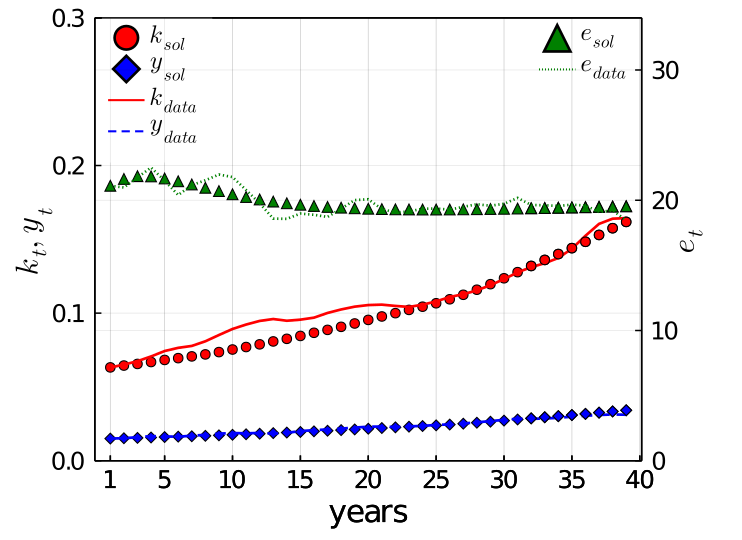

In [14]:
function solownneqn123(du,u,nnp,t)
sₜ = st(t) #savings rate
nₜ = nt(t)
# kₜ = kt(t)
# yₜ = yt(t)    
# eₜ = et(t)
    
θ,δ,gᵦ,α,gₐ = p123    
# k = u[1]
k,y,e = u

nn = ann123(t,res.minimizer)

zk = ann(t,res1.minimizer)
zy = ann12(t,res2.minimizer) 
du[1] = sₜ*y-((δ+nₜ+gᵦ)*k * zk[1]) # rate of change of kt
du[2] = y*(gᵦ+α*du[1]/k * zy[1])
du[3] = e*(-gₐ+du[2]/y) * nn[1]
    return du
end

    nntspan = (1.0e0,years_available*1.0) ## the year is hard coded, to be changed later
    nndatasize = years_available
    nntsteps = range(nntspan[1], nntspan[2], length=nndatasize)
    u0 = Float32[kic,yic,eic] ## kt initial
    prob_solownneqn = ODEProblem(solownneqn123, u0, nntspan)
    pred = solve(prob_solownneqn, TRBDF2(), abstol=1e-4, reltol=1e-4, saveat = nntsteps)

    kmse = Flux.mse(pred[1,:],kdata)
    ymse = Flux.mse(pred[2,:],ydata)
    emse = Flux.mse(pred[3,:],edata)
 kmsetrain = Flux.mse(pred[1,:][train],kdata[train])
    ymsetrain = Flux.mse(pred[2,:][train],ydata[train])
    emsetrain = Flux.mse(pred[3,:][train],edata[train])

        
    kmsefore = Flux.mse(pred[1,:][fore],kdata[fore])
    ymsefore = Flux.mse(pred[2,:][fore],ydata[fore])
    emsefore = Flux.mse(pred[3,:][fore],edata[fore])
    
    loss_summary[!,country] = [kmse,ymse,emse,kmsetrain,ymsetrain,emsetrain,kmsefore,ymsefore,emsefore]

plot_graphmodel7(pred,country,nntsteps,kdata,ydata,edata)

In [15]:
    kmse = Flux.mse(pred[1,:],kdata)
    ymse = Flux.mse(pred[2,:],ydata)
    emse = Flux.mse(pred[3,:],edata)

0.3701364803662324

# Calculating errors

In [16]:
USA_k_pred = convert(Array{Float64},pred[1,:])
USA_y_pred = convert(Array{Float64},pred[2,:])
USA_e_pred = convert(Array{Float64},pred[3,:])

kdata = identity.(kdata)
ydata = identity.(ydata)
edata = identity.(edata)

#checking the implementation of MSE
# println("(USA Mean Squared Errors) kt: ", Flux.mse(USA_k_pred, kdata), 
#     " yt: ", Flux.mse(USA_y_pred, ydata), 
#     " et: ", Flux.mse(USA_e_pred, edata))
println("(USA Mean Squared Errors) kt: ", (sqL2dist(USA_k_pred, kdata)/length(kdata)), 
    " yt: ", (sqL2dist(USA_y_pred, ydata)/length(ydata)), 
    " et: ", (sqL2dist(USA_e_pred, edata)/length(edata)))
println("(USA Root Mean Squared Errors) kt: ", (L2dist(USA_k_pred, kdata)/length(kdata)), 
    " yt: ", (L2dist(USA_y_pred, ydata)/length(ydata)), 
    " et: ", (L2dist(USA_e_pred, edata)/length(edata)))
#checking the implementation of MAE
# println("(USA Mean Absolute Errors) kt: ", Flux.mae(USA_k_pred, kdata), 
#     " yt: ", Flux.mae(USA_y_pred, ydata), 
#     " et: ", Flux.mae(USA_e_pred, edata))
println("(USA Mean Absolute Errors) kt: ", 
    L1dist(convert(Array{Float64},USA_k_pred),kdata)/length(kdata), 
    " yt: ", L1dist(convert(Array{Float64},USA_y_pred),ydata)/length(ydata), 
    " et: ", L1dist(convert(Array{Float64},USA_e_pred),edata)/length(edata))


function r2_impl(data,pred)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
return r2  
end
#checking the implementation of R2
# println("(USA R2 Correlation Coefficient) yt: ", r2(ols_y_USA),
#     " et: ", r2(ols_e_USA))
# println("(USA R2 Correlation Coefficient) yt: ", r2_impl(USA_y_reg[!, :lgyty0], predict(ols_y_USA)),
#     " et: ", r2_impl(USA_e_reg[!, :lgete0], predict(ols_e_USA)))
println("(USA R2 Correlation Coefficient) kt: ", r2_impl(kdata, USA_k_pred), 
    " yt: ", r2_impl(ydata, USA_y_pred), 
    " et: ", r2_impl(edata, USA_e_pred))

function Ar2_impl(data,pred, p)
tss = sum((data .-mean(data)).^2)
rss = sum((data .-pred).^2)
r2 = 1- rss/tss
n = size(data)[1]
# ar2 = 1 - (1 - r2)*(n-1)/(n-p-1)
ar2 = 1 - abs((1 - r2)*(n-1)/(n-p))
# using this formula means that the intercept is also counted as a parameter
# this formula requires we be explicit about all parameters
return ar2  
end

#checking the implementation of adjusted R2
# println("(USA Adjusted R2) yt: ", adjr2(ols_y_USA),
#     " et: ", adjr2(ols_e_USA))
# println("(USA Adjusted R2) yt: ", Ar2_impl(USA_y_reg[!, :lgyty0], predict(ols_y_USA),2),
#     " et: ", Ar2_impl(USA_e_reg[!, :lgete0], predict(ols_e_USA),2))
# for regular regression:
# 3 parameters are coeff of lge, coeff of t, y intercept 
# for k, there are 5 parameters including intercept
# for neural network, there are 412 parameters 
# (should divide by 3 because 412 parameters are used for 3 equations?)
println("(USA Adjusted R2) kt: ", Ar2_impl(kdata, USA_k_pred, 482), 
    " yt: ", Ar2_impl(ydata, USA_y_pred, 482), 
    " et: ", Ar2_impl(edata, USA_e_pred, 482))

println("(USA Mean Percentage Error) kt: ", mean((kdata.- USA_k_pred)./kdata)*100,
    " yt: ", mean((ydata.- USA_y_pred)./ydata)*100,
    " et: ", mean((edata.- USA_e_pred)./edata)*100)

println("(USA Mean Absolute Percentage Error) kt: ", mean(abs.((kdata.- USA_k_pred)./kdata))*100,
    " yt: ", mean(abs.((ydata.- USA_y_pred)./ydata))*100,
    " et: ", mean(abs.((edata.- USA_e_pred)./edata))*100)

println("(USA Mean Arctangent Absolute Percentage Error) kt: ", mean(atan.(abs.((kdata.- USA_k_pred)./kdata)))*100,
    " yt: ", mean(atan.(abs.((ydata.- USA_y_pred)./ydata)))*100,
    " et: ", mean(atan.(abs.((edata.- USA_e_pred)./edata)))*100)

println("(USA Mean Bias Error) kt: ", mean(kdata.- USA_k_pred),
    " yt: ", mean(ydata.- USA_y_pred),
    " et: ", mean(edata.- USA_e_pred))

function loglikelihood_calc(data,pred)
rss = sum((data .-pred).^2)
n = length(pred)
return -n/2*(log(2pi*rss/n)+1)
end

# implementation from julia: https://github.com/JuliaStats/GLM.jl/blob/950579166c52ff1cbbeab75cbc23235b30640802/src/lm.jl

#checking implementation for loglikelihood
# println("(USA Loglikelihood) yt: ", loglikelihood(ols_y_USA),
#     " et: ", loglikelihood(ols_e_USA))
# println("(USA Loglikelihood) yt: ", loglikelihood_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA)),
#     " et: ", loglikelihood_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA)))
println("(USA Loglikelihood) kt: ", loglikelihood_calc(kdata, USA_k_pred),
    " yt: ", loglikelihood_calc(ydata, USA_y_pred),
    " et: ", loglikelihood_calc(edata, USA_e_pred))

function aic_calc(data, pred, params)
    L = loglikelihood_calc(data,pred)
    return 2*params-2*L
end

#checking implementation for aic
# println("(USA Aikaike Information Criterion) yt: ", aic(ols_y_USA),
#     " et: ", aic(ols_e_USA))
# println("(USA Aikaike Information Criterion) yt: ", aic_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", aic_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA Aikaike Information Criterion) kt: ", aic_calc(kdata, USA_k_pred, 482),
    " yt: ", aic_calc(ydata, USA_y_pred, 482),
    " et: ", aic_calc(edata, USA_e_pred, 482))

function aicc_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + 2*params + 2*params*(params+1)/(n-params-1)
end

# checking implementation for aicc
# println("(USA Corrected AIC) yt: ", aicc(ols_y_USA),
#     " et: ", aicc(ols_e_USA))
# println("(USA Corrected AIC) yt: ", aicc_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", aicc_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA Corrected AIC) kt: ", aicc_calc(kdata, USA_k_pred, 482),
    " yt: ", aicc_calc(ydata, USA_y_pred, 482),
    " et: ", aicc_calc(edata, USA_e_pred, 482))

function bic_calc(data, pred, params)
    n = length(pred)
    L = loglikelihood_calc(data,pred)
    return -2*L + params*log(n)
end

# checking implementation for bic_calc
# println("(USA Corrected BIC) yt: ", bic(ols_y_USA),
#     " et: ", bic(ols_e_USA))
# println("(USA Corrected BIC) yt: ", bic_calc(USA_y_reg[!, :lgyty0], predict(ols_y_USA),4),
#     " et: ", bic_calc(USA_e_reg[!, :lgete0], predict(ols_e_USA),4))
# 4 degrees of freedom in the model: intercept, two coefficients and variance

println("(USA BIC) kt: ", bic_calc(kdata, USA_k_pred, 482),
    " yt: ", bic_calc(ydata, USA_y_pred, 482),
    " et: ", bic_calc(edata, USA_e_pred, 482))



(USA Mean Squared Errors) kt: 6.115825484649092e-5 yt: 8.92452404594639e-7 et: 0.3701364803662324
(USA Root Mean Squared Errors) kt: 0.0012522621054233231 yt: 0.00015127258505626896 et: 0.09742011590913628
(USA Mean Absolute Errors) kt: 0.005978285780288968 yt: 0.000722370787261388 et: 0.46319977266739326
(USA R2 Correlation Coefficient) kt: 0.9142242063067549 yt: 0.9646064912438029 et: 0.6583884198715495
(USA Adjusted R2) kt: 0.9926422569743943 yt: 0.9969639879622224 et: 0.9706969750679885
(USA Mean Percentage Error) kt: 5.856902871317127 yt: 0.961856812939367 et: -0.14261490749615865
(USA Mean Absolute Percentage Error) kt: 6.160402935511691 yt: 3.0613479695355217 et: 2.3246704138494367
(USA Mean Arctangent Absolute Percentage Error) kt: 6.131843669505917 yt: 3.0586564266371967 et: 2.323126526204096
(USA Mean Bias Error) kt: 0.005578939891787816 yt: 0.00010441499488934493 et: -0.01011961679324449
(USA Loglikelihood) kt: 133.85128858005868 yt: 216.2826039365657 et: -35.95787502266458
